# PROIECT CPPSMS

### GIRLA  Ionut-Alexandru 411-Siva

Importarea bibliotecilor necesare

In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import pickle
import ipyplot
import pandas as pd
import statistics
import random
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

Definirea variabilelor globale considerate

In [2]:
DATADIR = './UCMerced_LandUse/Images/'

CATEGORIES = ['agricultural', 'airplane', 'baseballdiamond'
              , 'beach', 'buildings', 'chaparral'
             , 'denseresidential', 'forest', 'freeway'
             , 'golfcourse', 'harbor', 'intersection'
             ,'mediumresidential', 'mobilehomepark', 'overpass'
             ,'parkinglot', 'river', 'runway'
             ,'sparseresidential', 'storagetanks', 'tenniscourt']

COMPONENTS = ['BLUE','GREEN', 'RED']


Importarea datelor

In [3]:
def import_dataset():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) #CONVERT CATEGORY NAME TO A NUMBER
        #print(f"os.listdir(path) {os.listdir(path)}")
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img))
                dim = (200, 200)
                img_array = cv2.resize(img_array, dim, interpolation = cv2.INTER_AREA)
                (b, g, r) = cv2.split(img_array)
                r = np.array(r.flatten())
                g = np.array(g.flatten())
                b = np.array(b.flatten())
                image = [b, g ,r]
                image = np.array(image, dtype = np.float32) #img -> array
                image = np.array(image.flatten())
                dataset.append([image, class_num])
            except Exception as e:
                pass
dataset = [] 
import_dataset()
print(np.shape(dataset))


(2100, 2)


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Impartirea in Matrice de caracteristici si Vectorul de valori dependente

In [4]:
X = [] #Matrice de caracteristici
y = [] #Vector de valori dependente
for features, label in dataset:
    X.append(features)
    y.append(label)

Calcularea vectorului de medii si al celui de variante pentru fiecare imagine pe fiecare dintre cele 3 componente (BGR)

In [5]:
mean_vector = []
var_vector = []
for index in range(len(X)):
    mean_values = []
    var_values = []
    current_image  = X[index]
    #print(np.shape(current_image))
    for component in range (0, 3):
        suma = 0
        for i in range(0, 200*200):
            suma += current_image[i+ 200*200*component]
        mean = suma/(200*200)
        mean_values.append(mean)
        
        deviations = [(x - mean) ** 2 for x in current_image[200*200*component: 200*200*(component+1)]]
        variance = sum(deviations)/(200*200)
        var_values.append(variance)
    var_vector.append(var_values)
    mean_vector.append(mean_values)

print(np.shape(mean_vector))
print(np.shape(var_vector))

(2100, 3)
(2100, 3)


Salvarea vectorului de medii si al celui de variante in fisiere text

In [6]:
print(mean_vector[0])
print(var_vector[0])

f = open( 'mean_vector.txt', 'w' )
for i in mean_vector:
    #print(i)
    f.write(str(i) + "\n")
f.close()

f = open( 'var_vector.txt', 'w' )
for i in var_vector:
    #print(i)
    f.write(str(i) + "\n")
f.close()

[111.928825, 116.807375, 115.970475]
[328.44650911937447, 371.02002060937076, 407.9642032743669]


Afisarea histogramei pentru fiecare componenta a primei imagini din fiecare categorie 

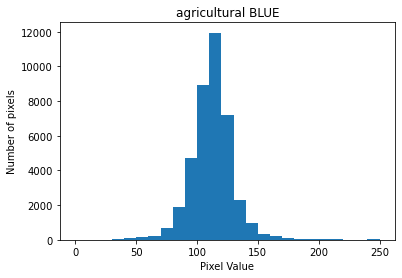

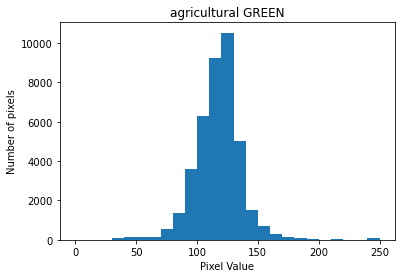

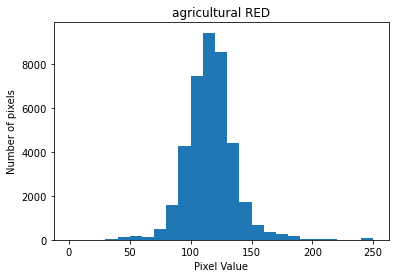

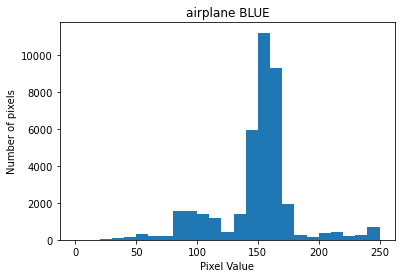

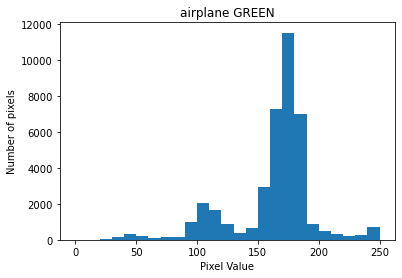

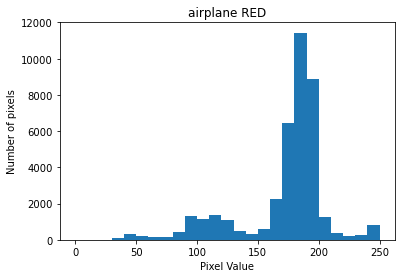

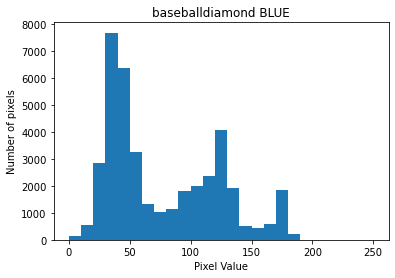

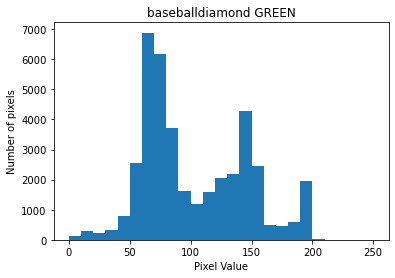

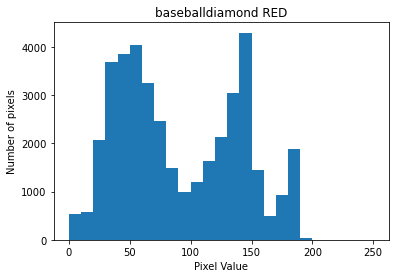

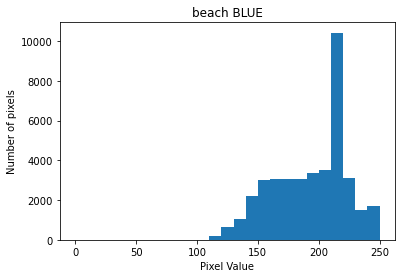

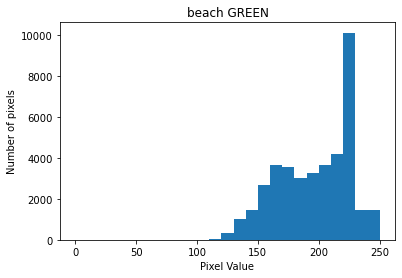

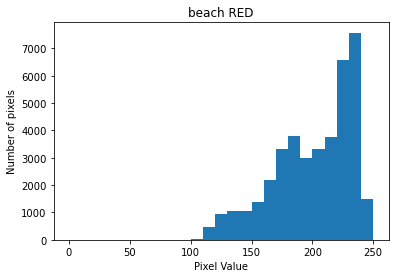

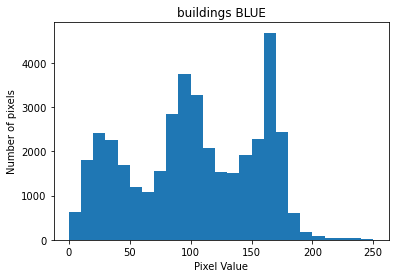

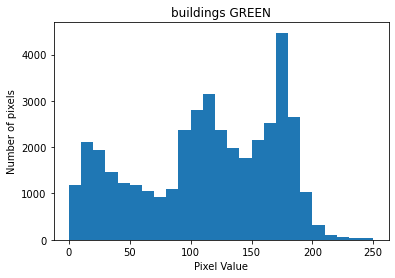

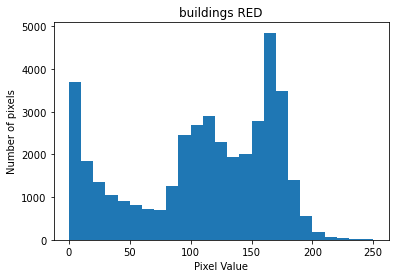

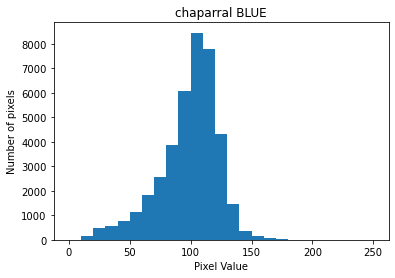

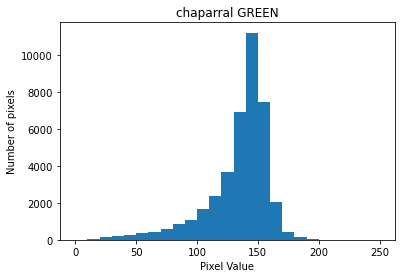

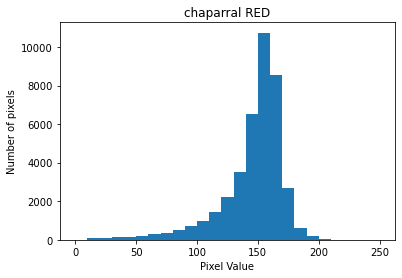

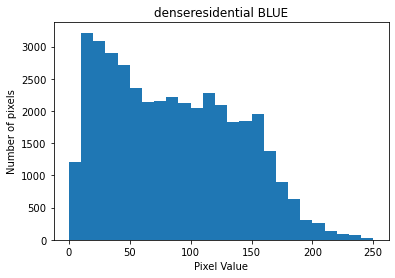

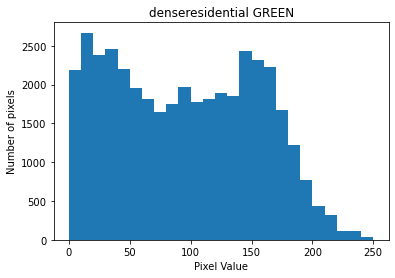

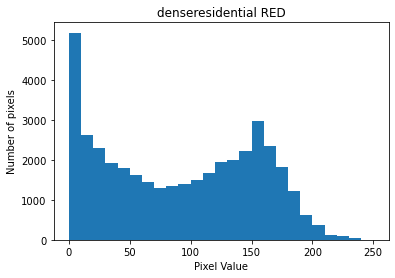

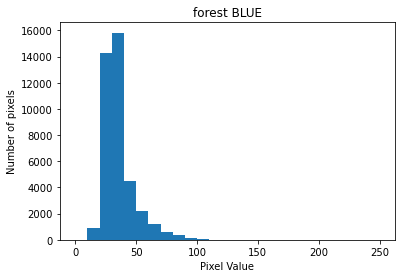

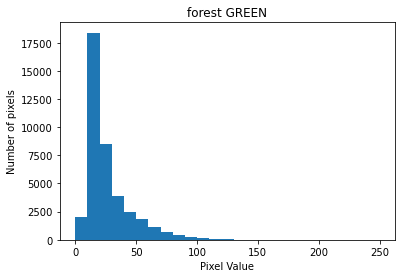

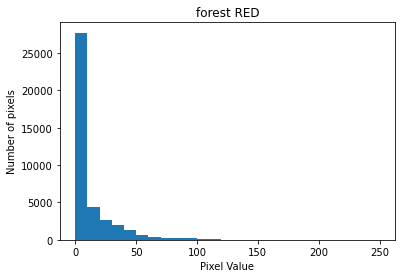

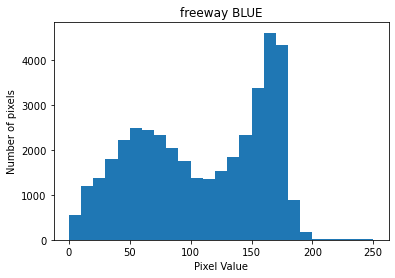

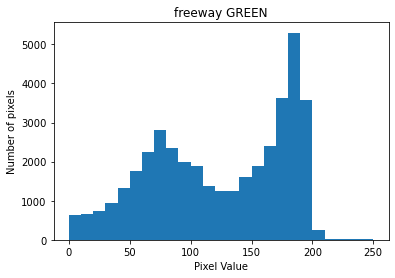

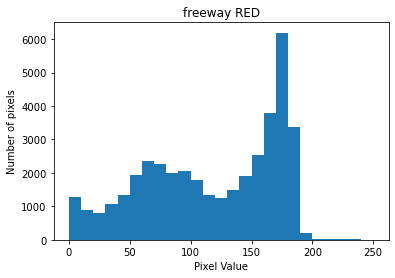

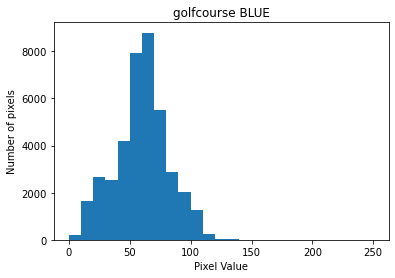

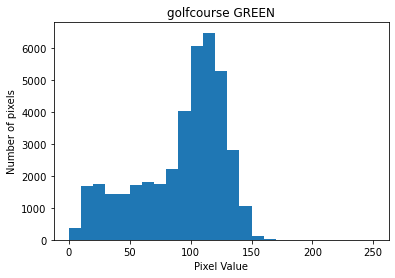

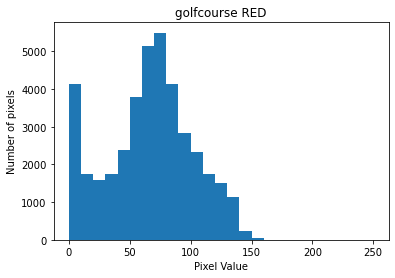

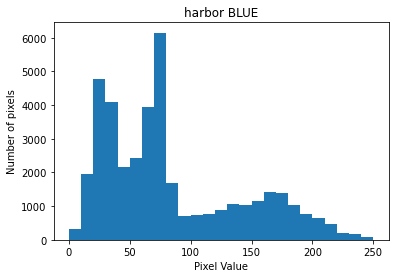

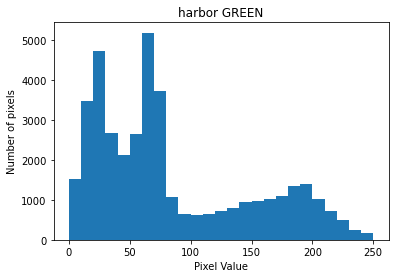

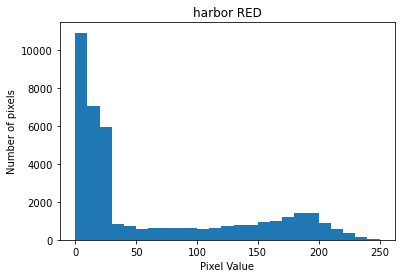

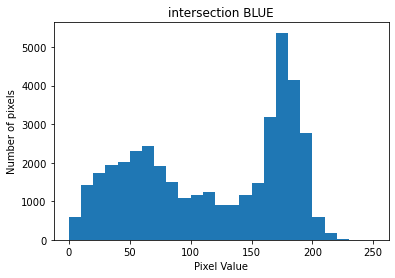

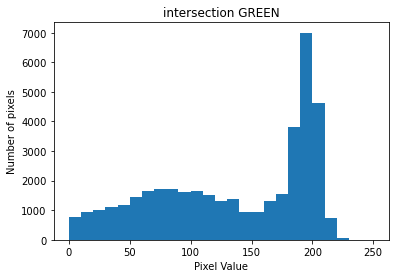

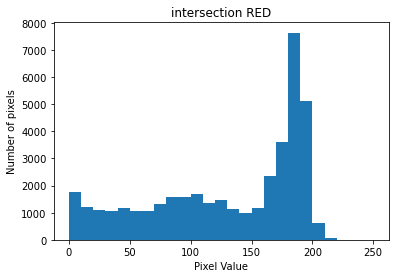

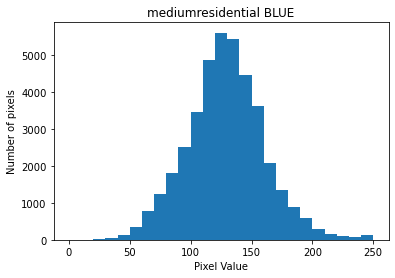

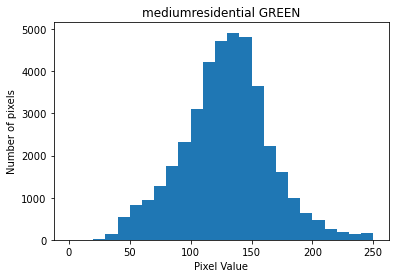

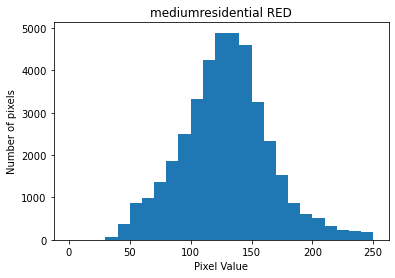

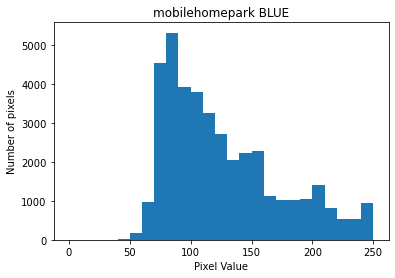

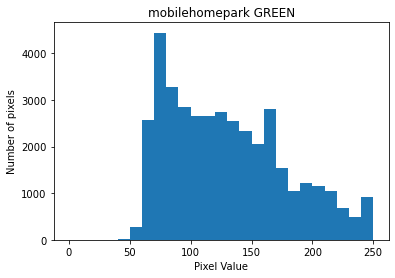

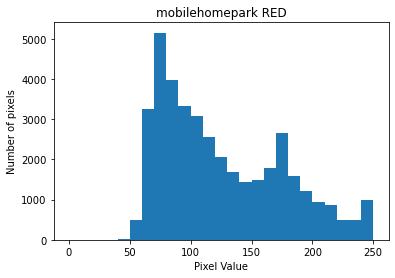

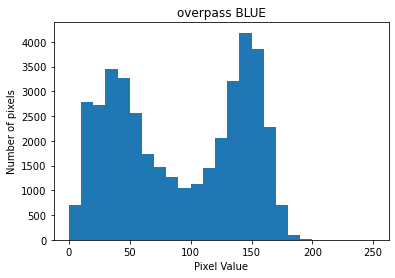

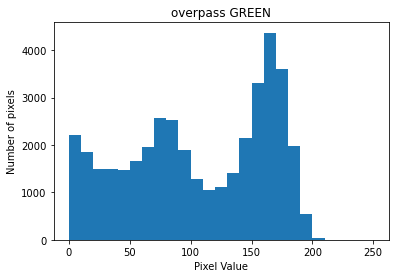

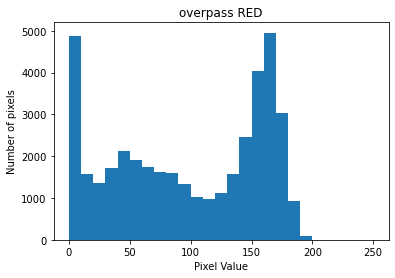

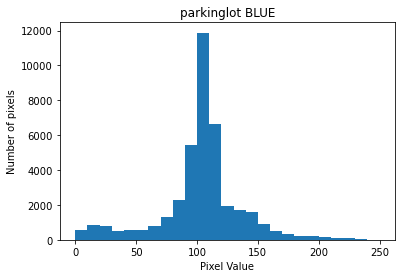

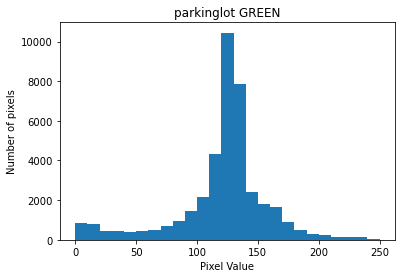

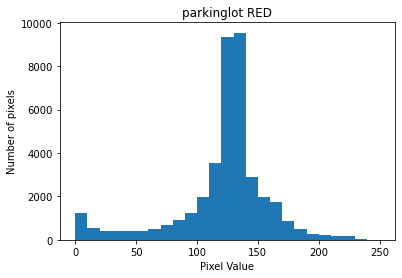

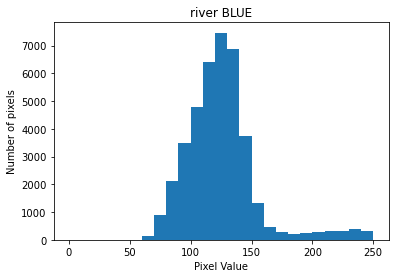

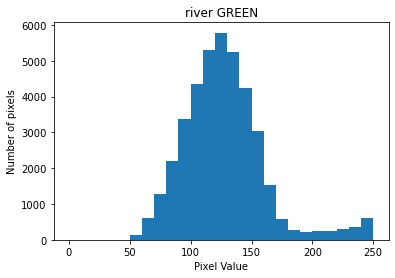

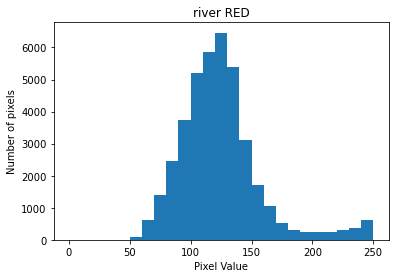

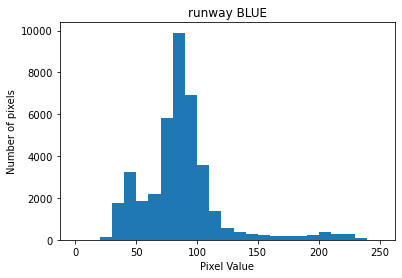

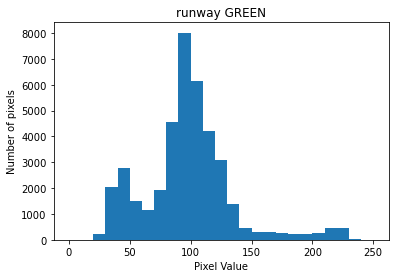

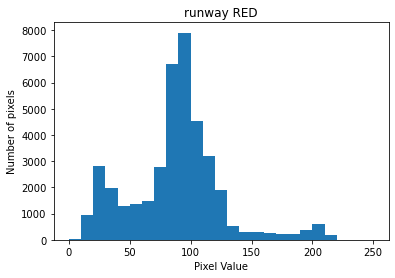

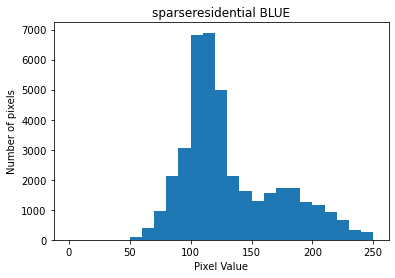

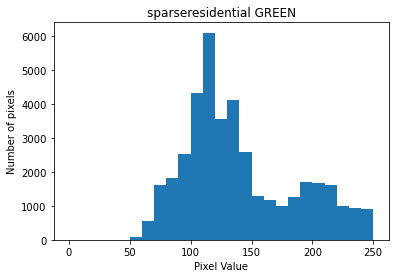

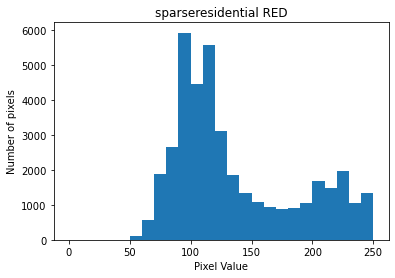

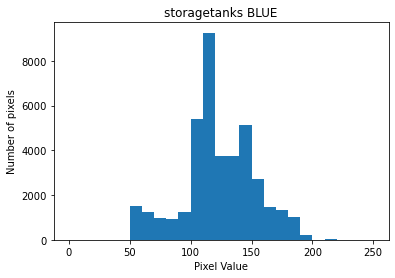

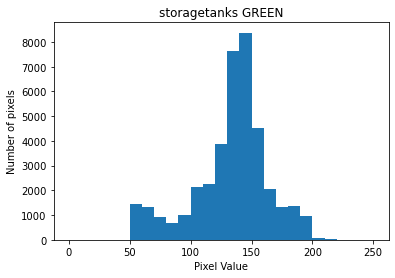

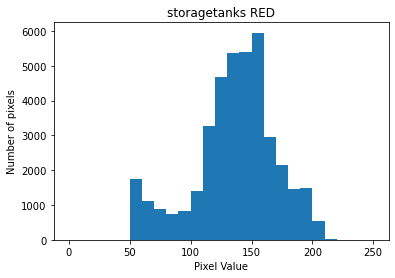

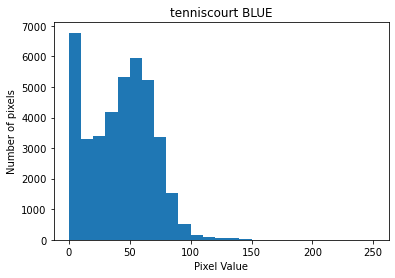

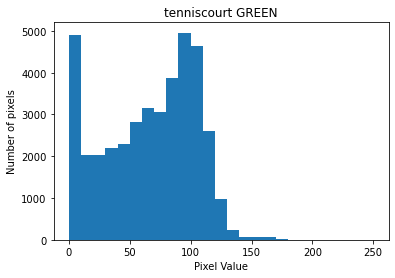

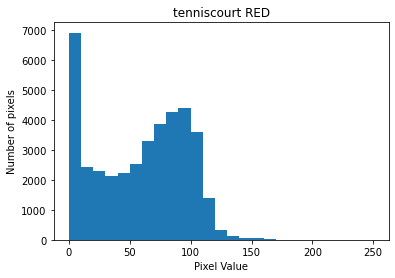

In [8]:
for index in range(0,len(X),100):
    current_image  = X[index]
    for component in range (0, 3):
        bins = range(0, 256,10)
        plt.hist(current_image[200*200*component: 200*200*(component+1)],bins=bins)
        plt.title(CATEGORIES[y[index]] + ' ' + COMPONENTS[component] )
        plt.xlabel('Pixel Value')
        plt.ylabel('Number of pixels')
        plt.show()

Calcularea mediei pe componente pentru fiecare clasa

In [9]:
means_per_classes = []
var_per_classes = []

for i in range(21):
    means_per_classes.append(np.mean(mean_vector[i*100:(i+1)*100], axis = 0))

for i in range(21):
    var_per_classes.append(np.var(var_vector[i*100:(i+1)*100], axis = 0))
    

Afisarea mediei pe componente pentru fiecare clasa urmata de afisarea unei singure valori pentru fiecare clasa reprezentata de media valorilor afisate anterior

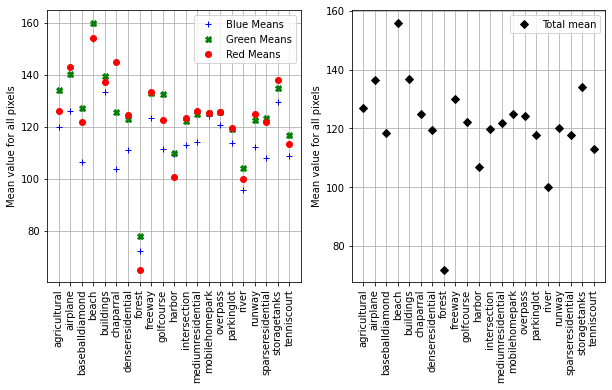

In [52]:
x = range(21)
y_red = []
y_blue = []
y_green = []

for blue,green,red in means_per_classes:
    y_blue.append(blue)
    y_green.append(green)
    y_red.append(red)
    
blue_means = np.array([x,y_blue])
green_means = np.array([x,y_green])
red_means = np.array([x,y_red])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.xticks(x,CATEGORIES,rotation=90)
plt.grid()
plt.plot(blue_means[0,],blue_means[1,],'b+')
plt.plot(green_means[0,],green_means[1,],'gX')
plt.plot(red_means[0,],red_means[1,],'ro')
plt.legend(["Blue Means", "Green Means", "Red Means"] )
plt.ylabel("Mean value for all pixels")

###################################

y_lum = []
for blue,green,red in means_per_classes:
    y_lum.append((blue + green + red )/3)
total_means = np.array([x,y_lum])

plt.subplot(1, 2, 2)
plt.xticks(x,CATEGORIES,rotation=90)
plt.grid()
plt.plot(total_means[0,],total_means[1,],'kD')
plt.legend(["Total mean"] )
plt.ylabel("Mean value for all pixels")

plt.show()


Afisarea Variantei pe componenta pentru fiecare clasa urmata de afisarea mediei acestor valori pentru fiecare clasa.

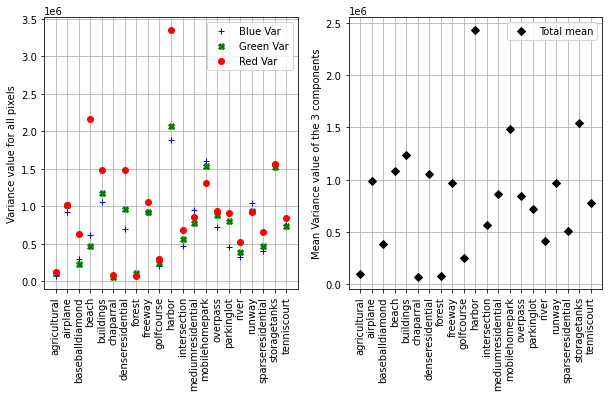

In [54]:
x = range(21)
y_red = []
y_blue = []
y_green = []

for blue,green,red in var_per_classes:
    y_blue.append(blue)
    y_green.append(green)
    y_red.append(red)
    
blue_var = np.array([x,y_blue])
green_var = np.array([x,y_green])
red_var = np.array([x,y_red])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.xticks(x,CATEGORIES,rotation=90)
plt.grid()
plt.plot(blue_var[0,],blue_var[1,],'b+')
plt.plot(green_var[0,],green_var[1,],'gX')
plt.plot(red_var[0,],red_var[1,],'ro')
plt.legend(["Blue Var", "Green Var", "Red Var"] )
plt.ylabel("Variance value for all pixels")


y_lum = []
for blue,green,red in var_per_classes:
    y_lum.append((blue + green + red )/3)
total_var = np.array([x,y_lum])

plt.subplot(1, 2, 2)
plt.xticks(x,CATEGORIES,rotation=90)
plt.grid()
plt.plot(total_var[0,],total_var[1,],'kD')
plt.legend(["Total mean"] )
plt.ylabel("Mean Variance value of the 3 components")

plt.show()

Impartirea setului de date in date de antrenare si date de testare

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

(1785, 120000)
(315, 120000)
(1785,)
(315,)


Grid search pentru a obtine cea mai buna combinatie de metoda de scalare a datelor, numar de componente principale pastrate si numar de vecini considerati "K" astfel incat scorul de acuratete sa fie maxim.

4
(4, 3)


E:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Combinatia: No scaling, 10, 5 este gata cu acuratetea: 32.06349206349206
Combinatia: No scaling, 10, 10 este gata cu acuratetea: 28.888888888888886
Combinatia: No scaling, 10, 20 este gata cu acuratetea: 29.20634920634921
Combinatia: No scaling, 10, 50 este gata cu acuratetea: 22.857142857142858
Combinatia: No scaling, 15, 5 este gata cu acuratetea: 32.06349206349206
Combinatia: No scaling, 15, 10 este gata cu acuratetea: 29.20634920634921
Combinatia: No scaling, 15, 20 este gata cu acuratetea: 27.61904761904762
Combinatia: No scaling, 15, 50 este gata cu acuratetea: 22.22222222222222
Combinatia: No scaling, 20, 5 este gata cu acuratetea: 30.158730158730158
Combinatia: No scaling, 20, 10 este gata cu acuratetea: 29.523809523809526
Combinatia: No scaling, 20, 20 este gata cu acuratetea: 26.031746031746035
Combinatia: No scaling, 20, 50 este gata cu acuratetea: 21.58730158730159
Combinatia: No scaling, 50, 5 este gata cu acuratetea: 26.34920634920635
Combinatia: No scaling, 50, 10 este g

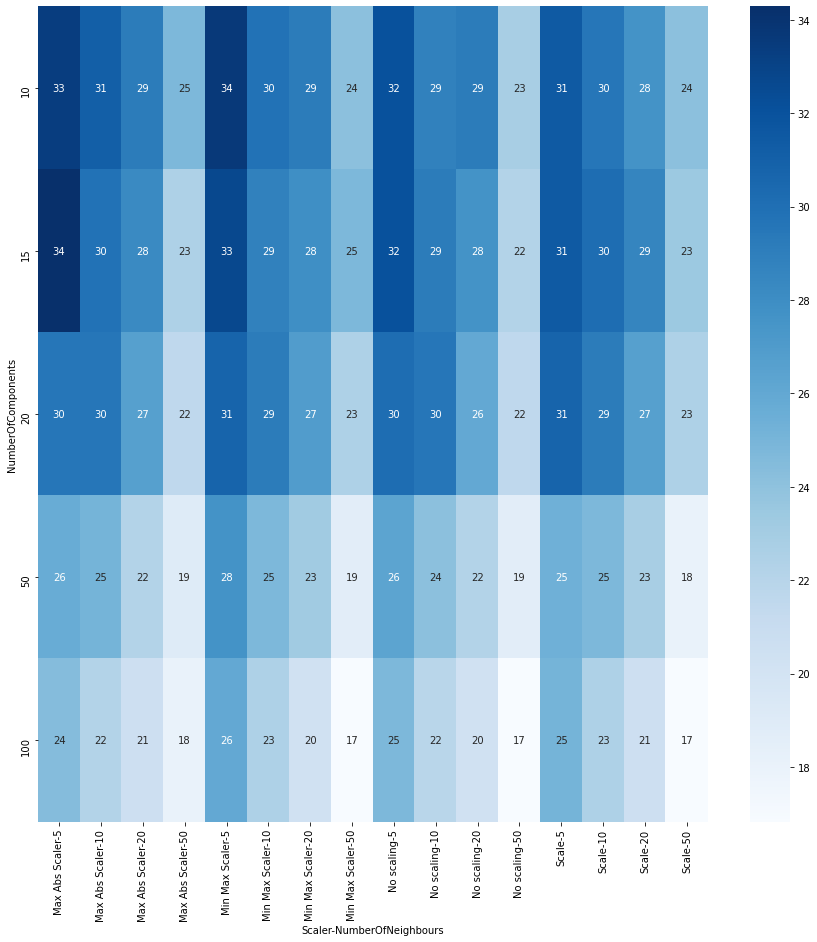

In [67]:
acc_list = []
scaling = [
    ('No scaling', x_train, x_test),
    ('Scale', preprocessing.scale(x_train), preprocessing.scale(x_test)),
    ('Min Max Scaler', MinMaxScaler().fit_transform(x_train), MinMaxScaler().fit_transform(x_test)),
    ('Max Abs Scaler', MaxAbsScaler().fit_transform(x_train), MaxAbsScaler().fit_transform(x_test))
]

print(len(scaling))
print(np.shape(scaling))

#pca_values = [5, 10, 15, 20, 25, 35, 50, 100, 200, 400]
pca_values = [10, 15, 20, 50, 100]
knn_nei = [5,10,20,50]
for name, train, test in scaling:
    for number_of_components in pca_values:
        for number_of_neighbours in knn_nei:
            train_local = copy.copy(train)
            test_local = copy.copy(test)
            pca = PCA(n_components = number_of_components)
            x_train_curent = pca.fit_transform(train_local)
            x_test_curent = pca.transform(test_local)    
            clf = KNeighborsClassifier(n_neighbors = number_of_neighbours, metric = 'minkowski', p = 2)
            clf.fit(x_train_curent, y_train)
            y_predicted = clf.predict(x_test_curent)
            acc_list.append([name, number_of_components,number_of_neighbours, accuracy_score(y_predicted, y_test)*100])
            print(f"Combinatia: {name}, {number_of_components}, {number_of_neighbours} este gata cu acuratetea: {accuracy_score(y_predicted, y_test)*100}")
acc_df = pd.DataFrame(acc_list)
acc_df.columns = ['Scaler', 'NumberOfComponents', 'NumberOfNeighbours', 'Accuracy']

print(acc_df[acc_df.Accuracy == acc_df.Accuracy.max()])

heatmap = pd.pivot_table(acc_df, values='Accuracy', 
                     index=['NumberOfComponents'], 
                     columns=['Scaler','NumberOfNeighbours'])

plt.figure(figsize=(15,15))
sn.heatmap(heatmap, annot=True, cmap="Blues")
plt.show()

Verificare matrice de confuzie pentru cea mai buna combinatie:

In [72]:
x_train_local = MaxAbsScaler().fit_transform(x_train)
x_test_local  = MaxAbsScaler().fit_transform(x_test)

pca = PCA(n_components = 15)
x_train_curent = pca.fit_transform(x_train_local)
x_test_curent = pca.transform(x_test_local)    

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train_curent, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test_curent)
accuracy_score(y_pred, y_test)*100

34.285714285714285

Afisarea matricei de confuzie pentru cea mai buna combinatie

In [73]:
cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_pred)
print(cm)

[[13  0  0  1  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  3  0  1  0  1  0  1  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  5  0  0  0  0  1  0  2  0  0  0  0  1  0  0  0  1  0  0]
 [ 0  1  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  1  1  3  0  0  0  2  1  0  0  1  0  0  1  0  0  0  1  0]
 [ 1  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  1  1  0  0  4  2  0  0  2  0  0  0  0  1  2  0  0  0  0  0]
 [ 4  0  0  0  0  0  0 10  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  7  0  0  0  1  0  0  1  0  0  0  0  0]
 [ 7  0  2  0  0  0  0  1  0  3  0  0  0  0  0  3  0  0  1  0  0]
 [ 1  0  2  0  0  0  0  0  2  1  7  0  2  0  1  0  0  1  0  0  1]
 [ 3  2  0  2  0  0  0  0  1  0  0  5  0  0  0  2  2  0  0  0  0]
 [ 5  0  1  0  0  1  0  0  1  1  0  1  4  0  0  1  1  0  0  0  0]
 [ 8  1  1  0  1  1  1  2  1  0  0  0  0  0  0  1  2  0  0  0  0]
 [ 1  2  2  1  0  0  0  0  2  0  1  0  0  1  1  5  0  0  0  1  0]
 [ 7  0  1

Incercarea de a obtine rezultate mai bune prin variatia metricii utilizate

Combinatia: Scaler: No scaling, Number of PCA Components: 5, Number of Neighbours: 5, Metric: euclidean este gata cu acuratetea: 24.444444444444443
Combinatia: Scaler: No scaling, Number of PCA Components: 5, Number of Neighbours: 5, Metric: manhattan este gata cu acuratetea: 23.174603174603174
Combinatia: Scaler: No scaling, Number of PCA Components: 5, Number of Neighbours: 5, Metric: chebyshev este gata cu acuratetea: 23.49206349206349
Combinatia: Scaler: No scaling, Number of PCA Components: 5, Number of Neighbours: 10, Metric: euclidean este gata cu acuratetea: 22.857142857142858
Combinatia: Scaler: No scaling, Number of PCA Components: 5, Number of Neighbours: 10, Metric: manhattan este gata cu acuratetea: 23.49206349206349
Combinatia: Scaler: No scaling, Number of PCA Components: 5, Number of Neighbours: 10, Metric: chebyshev este gata cu acuratetea: 24.126984126984127
Combinatia: Scaler: No scaling, Number of PCA Components: 10, Number of Neighbours: 5, Metric: euclidean este g

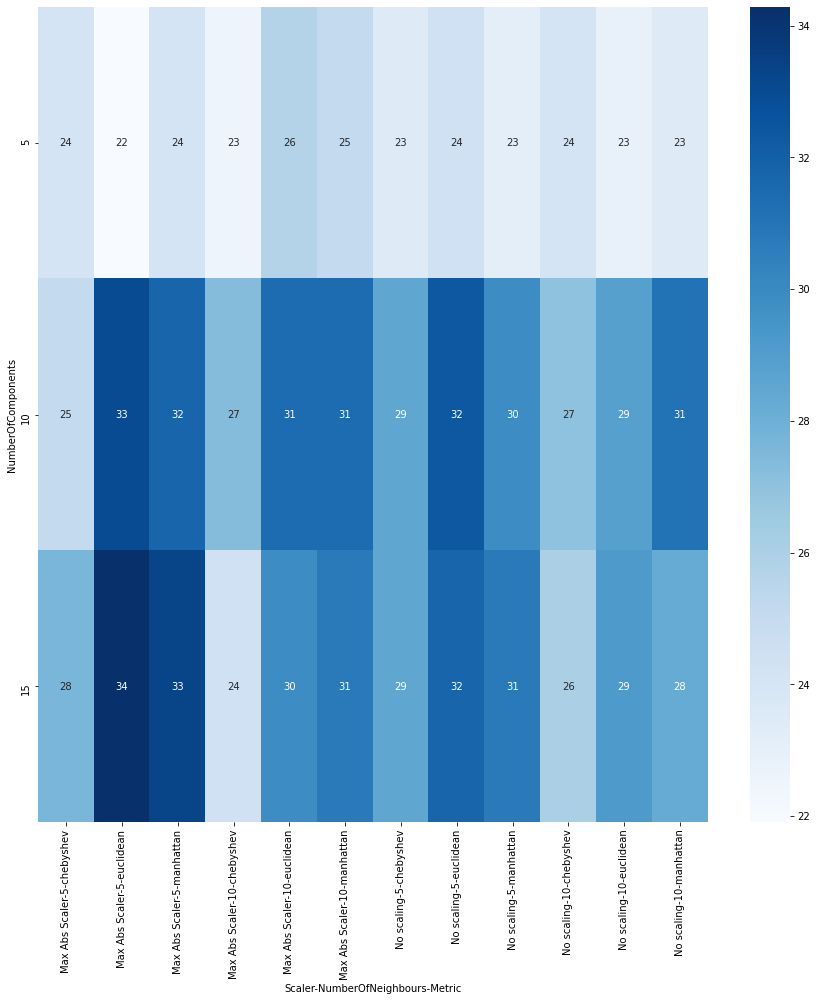

In [76]:
acc_list = []
scaling = [
    ('No scaling', x_train, x_test),
    ('Max Abs Scaler', MaxAbsScaler().fit_transform(x_train), MaxAbsScaler().fit_transform(x_test))
]

pca_values = [5,10, 15]
knn_nei = [5,10]
knn_metric = ['euclidean','manhattan','chebyshev', ]
for name, train, test in scaling:
    for number_of_components in pca_values:
        for number_of_neighbours in knn_nei:
            for knn_met in knn_metric:
                train_local = copy.copy(train)
                test_local = copy.copy(test)
                pca = PCA(n_components = number_of_components)
                x_train_curent = pca.fit_transform(train_local)
                x_test_curent = pca.transform(test_local)    
                clf = KNeighborsClassifier(n_neighbors = number_of_neighbours, metric = knn_met)
                clf.fit(x_train_curent, y_train)
                y_predicted = clf.predict(x_test_curent)
                acc_list.append([name, number_of_components,number_of_neighbours, knn_met,accuracy_score(y_predicted, y_test)*100])
                print(f"Combinatia: Scaler: {name}, Number of PCA Components: {number_of_components}, Number of Neighbours: {number_of_neighbours}, Metric: {knn_met} este gata cu acuratetea: {accuracy_score(y_predicted, y_test)*100}")
acc_df = pd.DataFrame(acc_list)
acc_df.columns = ['Scaler', 'NumberOfComponents', 'NumberOfNeighbours','Metric', 'Accuracy']

print(acc_df[acc_df.Accuracy == acc_df.Accuracy.max()])

heatmap = pd.pivot_table(acc_df, values='Accuracy', 
                     index=['NumberOfComponents'], 
                     columns=['Scaler','NumberOfNeighbours','Metric'])

plt.figure(figsize=(15,15))
sn.heatmap(heatmap, annot=True, cmap="Blues")
plt.show()